## Pre-requisite
**Setup Ollama**<br>
For setting up ollama in your local environment, click [here](https://github.com/ollama/ollama).

**Pull Model**<br>
Pull the required model running the following command:
```bash
ollama pull llava
```
To use a different multimodal model check [here](https://ollama.com/library).

**Install python library**<br>
Install the python library for langchain_ollama
```bash
pip install langchain-ollama
```
To learn more, click [here](https://python.langchain.com/docs/integrations/providers/ollama/).

## Import Libraries

In [1]:
import base64
from io import BytesIO
from IPython.display import HTML, display, Markdown
from PIL import Image
from langchain_core.messages import HumanMessage
from langchain_ollama import ChatOllama
from langchain_core.output_parsers import StrOutputParser

* base64: Converts image data into a base64 string for embedding into HTML.
* BytesIO: Used to handle image data in memory.
* IPython.display: Enables display of rich content (like images, Markdown) in a Jupyter Notebook environment.
* PIL.Image: Used to open and manipulate images.
* LangChain and ChatOllama: Integrates the language model LLava for generating responses based on both image and text input.

## Define Function to Convert an Image to Base64

In [2]:
def convert_to_base64(pil_image):
    buffered = BytesIO()
    pil_image.save(buffered, format="JPEG")
    img_str = base64.b64encode(buffered.getvalue()).decode("utf-8")
    return img_str

* Converts a PIL image into a base64-encoded string.
* This allows embedding the image in HTML or passing it in API requests.
* Saves the image to a memory buffer (BytesIO), encodes it as base64, and returns the encoded string.

## Define Function to Render Image in Notebook

In [3]:
def plt_img_base64(img_base64):
    image_html = f'<img src="data:image/jpeg;base64,{img_base64}" />'
    display(HTML(image_html))

* Takes a base64-encoded image string and displays it as HTML using an <img> tag.
* Useful for rendering the image inline in a notebook.

## Load and Display Image


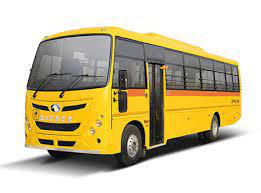

In [4]:
file_path = './Images/bus.jpg'
pil_image = Image.open(file_path)
image_b64 = convert_to_base64(pil_image)
plt_img_base64(image_b64)

Loads an image file (bus.jpg) using PIL, converts it to a base64 string, and then displays it in the notebook via HTML using plt_img_base64.

## ChatOllama Initialization

In [5]:
llm = ChatOllama(
    model="llava",
    temperature=0.8,
    seed=42,
)

* ChatOllama is instantiated using the LLava model, which is a variant of the LlaMA model designed to process both text and image inputs.
* The model's temperature is set to 0.8, allowing it to generate more creative responses.

## Create a Message for the LLM

In [6]:
def prompt_func(data):
    text = data["text"]
    image = data["image"]

    image_part = {
        "type": "image_url",
        "image_url": f"data:image/jpeg;base64,{image}",
    }

    content_parts = []

    text_part = {"type": "text", "text": text}

    content_parts.append(image_part)
    content_parts.append(text_part)

    return [HumanMessage(content=content_parts)]

* prompt_func(data):
    * Accepts a dictionary with text and image data.
    * Prepares the image and text as two separate content parts in a structured format.
        * The image is represented by its base64 string in the "image_url" key.
        * The text is passed separately under "text".
    * Returns this formatted data as a HumanMessage object, which the language model can process.

## Query and Response Chain

In [7]:
chain = prompt_func | llm | StrOutputParser()

query_chain = chain.invoke(
    {"text": "What is the color of the bus in the image?", "image": image_b64}
)

display(Markdown(query_chain))

 The color of the bus in the image is yellow. 

--------------------------------------------------------------------------------------------------------------------------------------------
**Code Explanation**<br>
* The | operator defines a pipeline. Here, the flow is:
    * prompt_func: Prepares the text and image data.
    * llm: Sends the formatted input to the LLava model for processing.
    * StrOutputParser(): Parses the response into a string format that can be displayed or printed.
* This sends the query and the image (base64-encoded) to the model.
* The model processes both the image and the question: "What is the color of the bus in the image?"
* The LLava model generates a response.
* Finally, the response is displayed in Markdown format, making it easy to render in a notebook environment.

## Summary
* Image Handling: The code loads an image, converts it into base64, and displays it.
* LLava Model Interaction: The image and a text query are passed to the LLava model, which is capable of understanding and generating responses based on both text and images.
* Querying the Model: The model is asked about the color of the bus in the image, and its response is rendered as Markdown.